<a href="https://colab.research.google.com/github/marral2/DLMs/blob/main/VAE_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VAE (Variational Auto-Encoder) with CIFAR10 dataset
Visulization is from MNIST
![VAE_3D](https://ichko.github.io/assets/visualizing-vae-with-efemarai-v1/efem-train.gif)


Recomended Web-site to read and practice more about VAEs:
[VAE in 3D](https://ichko.github.io/visualizing-vae-with-efemarai)

### Libraries used

In [ ]:
from tensorflow.keras.layers import Lambda, Input, Dense, Conv2D, Conv2DTranspose, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.losses import binary_crossentropy, mean_squared_error
from tensorflow.keras import backend as K
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
32*32*3

3072

In [ ]:
x_train.shape[1:]

(32, 32, 3)

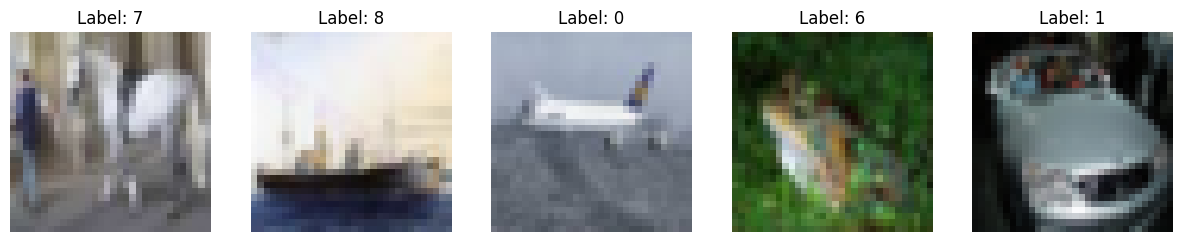

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Set the random seed for reproducibility
np.random.seed(42)

# Sample 5 random indices from the training dataset
random_indices = np.random.choice(x_train.shape[0], 5, replace=False)

# Plot the 5 random images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for i, idx in enumerate(random_indices):
    axes[i].imshow(x_train[idx])
    axes[i].axis('off')
    axes[i].set_title(f'Label: {y_train[idx][0]}')

plt.show()


### Extra examples of cifar10 dataset (image)
<img src="https://miro.medium.com/v2/0*BdetXYemwXwOqNTs.jpg" alt="encoder" width="800"/>


### Data Standarization = Adjustment of the data values to be between 0 and 1


In [ ]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

In [ ]:
#The shape of inputs typically is (batch_size, height, width, channels)
input_shape = x_train.shape[1:] # then this line of code is returning only the  "height, width, channels" the shape position from 1 to the end of the list that describes the dimensions of the inputs
batch_size = 128
latent_dim = 64 #or Latent Layer, is the Number of dimensions to represent the encoded data
epochs = 5

![Auto-Encoder](https://www.researchgate.net/publication/352703131/figure/fig2/AS:1038132996763648@1624521602141/An-example-autoencoder-model-architecture-with-symmetrical-encoder-and-decoder-networks.ppm)


In [ ]:
inputs = Input(shape = input_shape, name = "encoder_input")
x = Conv2D(32, 3, activation = "relu", strides = 2, padding = "same")(inputs)
x = Conv2D(64, 3, activation = "relu", strides = 2, padding =  "same")(x)

shape_before_flat = K.int_shape(x)

x = Flatten()(x)
x = Dense(256, activation = "relu" )(x)

z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)


In [ ]:
shape_before_flat # (batch_size, height, width, channels)

(None, 8, 8, 64)

In [ ]:
8*8*64

4096

### VAE Encoder, and its dimensions indicated:
<img src="https://drive.google.com/uc?id=1ID4VgS3KmsLKXSbeME1_G-y0TQ3m1Ll8" alt="encoder" width="600"/>




### For reference of the Keras Conv2D function:
A gift of a Conv2D Keras function with a stride of 1 and no padding, so the resulting matrix is smaller

![Conv2D](https://i.sstatic.net/xdXTn.gif)


A Gift of a Conv2D Keras function with stride=2 and padding=1

![Conv2D](https://miro.medium.com/v2/resize:fit:2000/1*LjXV6eQKTQcg-PJnBRE0VA.gif)


Note:


A "stride" of 2 means the filter moves two pixels at a time both horizontally and vertically. Larger strides result in a smaller output size.



Padding="same": Ensures the output size is the same as the input size by padding the input with zeros around the border, \\
*when a stride of 1 is used*.

In [ ]:
def sampling(args):
  z_mean, z_log_var = args

  dim = K.int_shape(z_mean)[1]

  # TODO: check dimensions
  epsilon = K.random_normal(shape = (K.shape(z_mean)[0], dim))

  return z_mean + K.exp(0.5 * z_log_var) * epsilon

The return statement in the `sampling` function is:

$ z_{\text{mean}} + (e^{(1/2)} \cdot z_{\text{σ}}) \cdot \epsilon $


In [ ]:
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

### *Lambda(sampling, output_shape=(latent_dim,), name='z'):*

Lambda Layer: This is a Keras layer that wraps an arbitrary expression (a function) as a layer object. It allows you to define custom operations that will be executed as part of the model.

sampling Function: This is the function defined earlier, which performs the reparameterization trick. It takes z_mean and z_log_var as inputs and returns a sampled latent vector z.

output_shape=(latent_dim,): This specifies the shape of the output of the Lambda layer. Here, latent_dim is a variable that defines the dimensionality of the latent space.

name='z': This assigns a name to the layer, which can be useful for model visualization and debugging.


### *Inputs to the Lambda Layer:*

([z_mean, z_log_var])

This specifies that the inputs to the Lambda layer are z_mean and z_log_var.

These inputs are passed as a list to the sampling function.

### Why do we sample a latent vector $z$ ?
![Latent_Vector](https://miro.medium.com/v2/resize:fit:1358/0*2DZwupQZTnpBEH1s.png)

More Importantly, How should it be done?

![ReParametrization](https://drive.google.com/uc?id=1tbM4FOfyrP9KrD--T8XOWR3f3Ly2QXwr)

To reinforce this is recommended to read the blog: [VAE in TensorFlow by learnopencv](https://learnopencv.com/variational-autoencoder-in-tensorflow/)

# Encoder

In [ ]:
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 16, 16, 32)           896       ['encoder_input[0][0]']       
                                                                                                  
 conv2d_1 (Conv2D)           (None, 8, 8, 64)             18496     ['conv2d[0][0]']              
                                                                                                  
 flatten (Flatten)           (None, 4096)                 0         ['conv2d_1[0][0]']            
                                                                                            

# Decoder
### VAE Decoder, and its dimensions indicated (mirrored numbers):
![encoder](https://drive.google.com/uc?id=1a6KmCNWfbq1MZmF4NYtPAqc9EgoreFdW)



In [ ]:
shape_before_flat

(None, 8, 8, 64)

In [ ]:
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')

# Check if work
x = Dense(np.prod(shape_before_flat[1:]), activation = "relu")(latent_inputs)
x = Reshape(shape_before_flat[1:])(x)
x = Conv2DTranspose(64, 3, activation = "relu", strides = 2, padding =  "same")(x)
x = Conv2DTranspose(32, 3, activation = "relu", strides = 2, padding = "same")(x)
outputs = Conv2DTranspose(3, 3, activation = "sigmoid", padding = "same")(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 64)]              0         
                                                                 
 dense_1 (Dense)             (None, 4096)              266240    
                                                                 
 reshape (Reshape)           (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 16, 16, 64)        36928     
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 32, 32, 32)        18464     
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 32, 32, 3)         867 

In [ ]:
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

In [ ]:
input_shape

(32, 32, 3)

In [ ]:
reconstruction_loss = mean_squared_error(K.flatten(inputs), K.flatten(outputs)) * input_shape[0] * input_shape[1]
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)

In [ ]:
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')
vae.summary()

Model: "vae"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 encoder (Functional)        [(None, 64),                 1101120   ['encoder_input[0][0]']       
                              (None, 64),                                                         
                              (None, 64)]                                                         
                                                                                                  
 decoder (Functional)        (None, 32, 32, 3)            322499    ['encoder[0][2]']             
                                                                                                

In [ ]:
# Train the autoencoder
epochs=30
vae.fit(x_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

Epoch 1/30
391/391 [==============================] - 5s 14ms/step - loss: 35.2724 - val_loss: 35.2420
Epoch 2/30
391/391 [==============================] - 5s 14ms/step - loss: 35.1518 - val_loss: 35.1668
Epoch 3/30
391/391 [==============================] - 5s 13ms/step - loss: 35.0389 - val_loss: 35.1469
Epoch 4/30
391/391 [==============================] - 5s 13ms/step - loss: 34.9174 - val_loss: 35.1256
Epoch 5/30
391/391 [==============================] - 5s 12ms/step - loss: 34.8447 - val_loss: 34.8917
Epoch 6/30
391/391 [==============================] - 5s 12ms/step - loss: 34.7438 - val_loss: 34.8107
Epoch 7/30
391/391 [==============================] - 5s 14ms/step - loss: 34.7188 - val_loss: 34.9235
Epoch 8/30
391/391 [==============================] - 5s 13ms/step - loss: 34.6740 - val_loss: 34.7715
Epoch 9/30
391/391 [==============================] - 5s 12ms/step - loss: 34.6195 - val_loss: 34.6668
Epoch 10/30
391/391 [==============================] - 5s 12ms/step - los

In [ ]:
_x_test = [0.8] * 64
_x_test

[0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8]

In [ ]:
z_sample = np.array([_x_test])
x_decoded = decoder.predict(z_sample)

1/1 [==============================] - 0s 18ms/step


In [ ]:
x_decoded.shape

(1, 32, 32, 3)

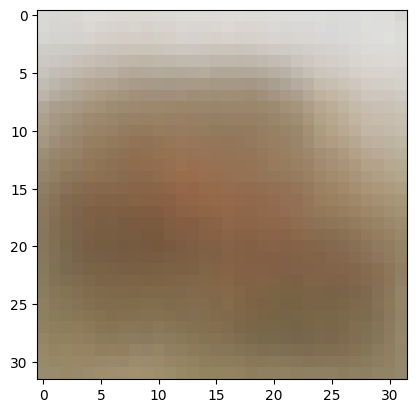

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_decoded[0])

### What is the VAE learning?

![Learning_2_Different_distributions](https://ermongroup.github.io/blog/assets/blog/mmd_vae/kl_latent.gif)

For additional details on the training of VAEs and the KL divergence Loss Function check: [A Tutorial on Information Maximizing Variational Autoencoders (InfoVAE)](https://ermongroup.github.io/blog/a-tutorial-on-mmd-variational-autoencoders/)

### A Random image reconstructed

1/1 [==============================] - 0s 492ms/step


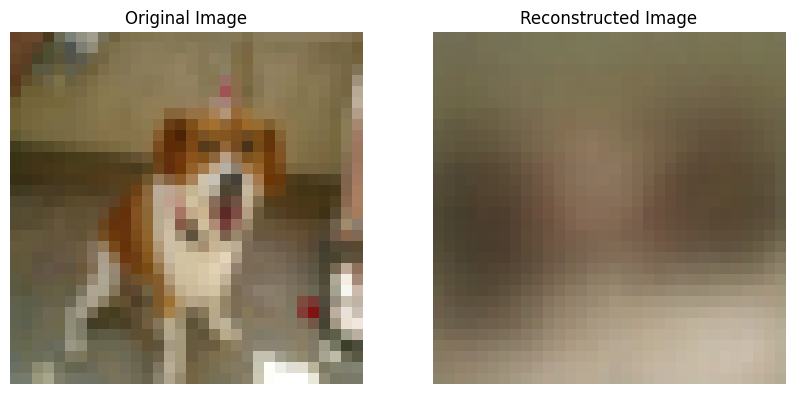

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample a random image from the test set
random_index = np.random.randint(0, x_test.shape[0])
random_image = x_test[random_index]

# Add batch dimension and normalize the image
input_image = np.expand_dims(random_image, axis=0) / 255.0

# Use the VAE to reconstruct the image
reconstructed_image = vae.predict(input_image)

# Remove batch dimension and denormalize the reconstructed image
reconstructed_image = reconstructed_image[0] * 255.0
reconstructed_image = reconstructed_image.astype(np.uint8)

# Plot the original and reconstructed images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Original image
axes[0].imshow(random_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Reconstructed image
axes[1].imshow(reconstructed_image)
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')

plt.show()
